### Imports and Utility-Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_graph_x_y(x, y, x_range=[0,10], y_range=[0,10]):
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.xlim(x_range[0], x_range[1])
    plt.ylim(y_range[0], y_range[1])
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.grid(False)
    
    return plt

### Functions

In [3]:
def linear_function(matrix_x, scalar_a=1, scalar_b=0):
    return matrix_x * scalar_a + scalar_b

#### Linear-Function
#### Input

The input is a set of d-dimensional points stored in a matrix (`matrix_x`) and the scalar values a, b (`scalar_a`, `scalar_b`)
$$
\text{matrix-x}=
\begin{bmatrix}
 p_{1,1}&\ldots&p_{1,d}\\
 \vdots \\
 p_{n,1}&\ldots&p_{n,d}
\end{bmatrix}\in\mathbb{M}^{n\times d}
$$

#### Output

$$
f(x,a) = \text{matrix-x}*a+b=\begin{bmatrix}
a*p_{1,1}+b&\ldots&a*p_{1,d}+b\\
 \vdots \\
a*p_{n,1}+b&\ldots&a*p_{n,d}+b
\end{bmatrix}\in\mathbb{M}^{n\times d}
$$



In [4]:
def affine_transformation(matrix_x, scalar_m=1, scalar_a=1, scalar_b=0):
    return matrix_x ** scalar_m * scalar_a + scalar_b

#### Affine-Transformation

#### Input

The input is a set of d-dimensional points stored in a matrix and the scalar values m,a,b (`scalar_m`, `scalar_a`, `scalar_b`)
$$
\text{matrix-x}=
\begin{bmatrix}
 p_{1,1}&\ldots&p_{1,d}\\
 \vdots \\
 p_{n,1}&\ldots&p_{n,d}
\end{bmatrix}\in\mathbb{M}^{n\times d}
$$

#### Output

$$
f(x,a,b,m) = \text{matrix-x}^m*a+b=\begin{bmatrix}
a*p_{1,1}^m+b&\ldots&a*p_{1,d}^m+b\\
 \vdots \\
a*p_{n,1}^m+b&\ldots&a*p_{n,d}^m+b
\end{bmatrix}\in\mathbb{M}^{n\times d}
$$



### Visualizations

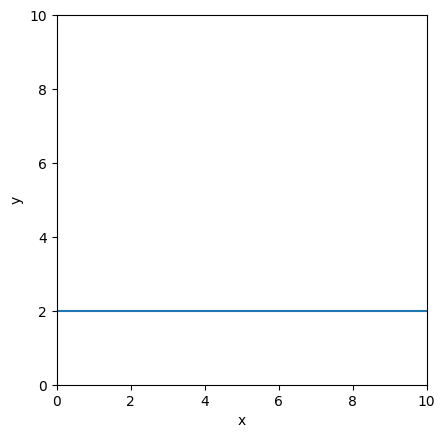

In [5]:
x = np.linspace(0, 10, 100)
plot_graph_x_y(x, linear_function(x, 0, 2)).show()

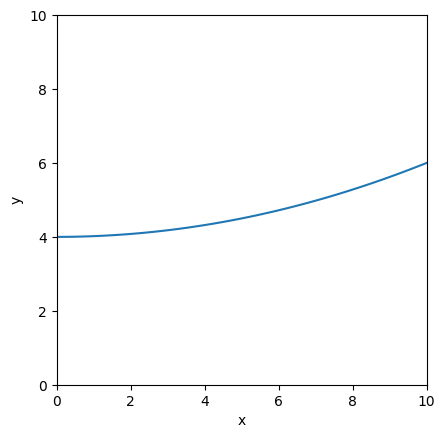

In [6]:
x = np.linspace(0, 10, 100)
plot_graph_x_y(x, affine_transformation(x, 2, 0.02, 4)).show()

#### Combined-Segments

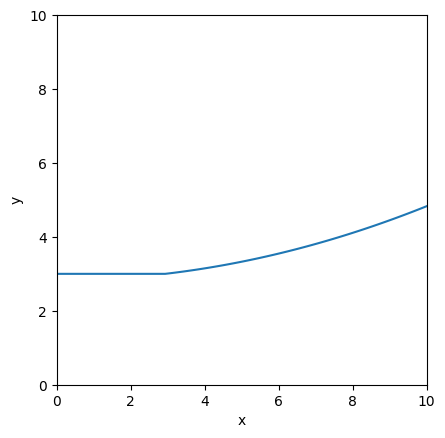

In [7]:
x = np.linspace(0, 10, 100)
# [m1, a1], [m2, a2], ...
parameters_values = [[1,0],[2, 0.02]]
percentages = [0.3, 0.7]

def create_street_section(parameters_values, percentages, b=1, x=np.linspace(0, 10, 100)):
    x_split = np.split(x, (np.cumsum(percentages)[:-1] * len(x)).astype(int))
    street_y = np.array([])

    for i, [m, a] in enumerate(parameters_values):
        if i > 0:
            prev_x = x_split[i-1][-1]
            b = street_y[-1] - a * (prev_x**m)
        x = x_split[i]
        street_y = np.append(street_y, affine_transformation(x, m, a, b))

    return street_y

street_y = create_street_section(parameters_values, percentages, 3, x)
plot_graph_x_y(x, street_y, x_range=[0,10], y_range=[0,10]).show()

### Splines

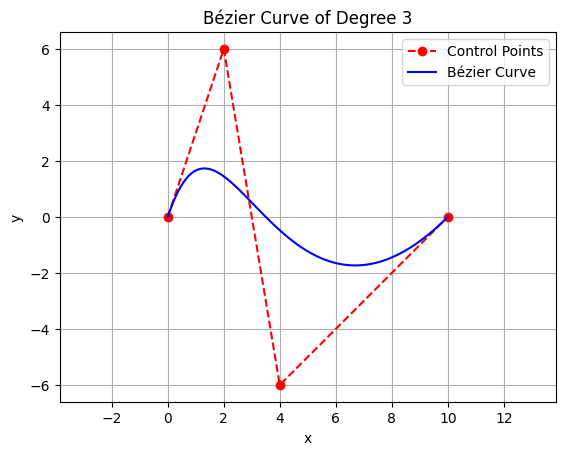

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def bezier_curve(control_points, n_points=100):
    """
    Calculate Bézier Curve coordinates from control points.

    Parameters:
    - control_points: List of control points, with each point as a tuple (x, y).
    - n_points: Number of points to calculate along the curve.

    Returns:
    - x_vals, y_vals: Coordinates of points on the Bézier curve.
    """
    n = len(control_points) - 1
    t = np.linspace(0.0, 1.0, n_points)
    curve = np.zeros((n_points, 2))
    for i in range(n + 1):
        bernstein_polynomial = comb(n, i) * (t ** i) * ((1 - t) ** (n - i))
        curve += np.outer(bernstein_polynomial, control_points[i])
    return curve[:, 0], curve[:, 1]

# Define degree
degree = 3  # You can change this value to your desired degree

# Define control points
control_points = [(0, 0), (2, 6), (4, -6), (10, 0)]  # Adjust these for your degree

# Calculate Bézier curve points
x_vals, y_vals = bezier_curve(control_points, n_points=100)

# Plot the control points and the Bézier curve
plt.plot(*zip(*control_points), 'ro--', label='Control Points')
plt.plot(x_vals, y_vals, 'b-', label='Bézier Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Bézier Curve of Degree {degree}')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()